In [1]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("movie_boxoffice.csv",encoding='ISO-8859-1')
data.head()

,Movie Name,Budget,Youtube Views,Youtube Likes,Youtube Dislikes,Box Office Collection
0,2 States,36.0,8576361.0,26622.0,2527.0,104.00
1,Table No. 21,10.0,1087320.0,1129.0,137.0,12.00
2,Amit Sahni Ki List,10.0,572336.0,586.0,54.0,4.00
3,Rajdhani Express,7.0,42626.0,86.0,19.0,0.35
4,Bobby Jasoos,18.0,3113427.0,4512.0,1224.0,10.80


In [33]:
data.describe()

,Budget,Youtube Views,Youtube Likes,Youtube Dislikes,Box Office Collection
count,149.000000,1.490000e+02,149.000000,149.000000,150.000000
mean,29.442953,3.337920e+06,7877.536913,1207.818792,60.196133
std,28.237981,3.504407e+06,12748.047191,1852.692938,109.297341
min,2.000000,4.354000e+03,1.000000,1.000000,0.010000
25%,11.000000,1.076591e+06,1377.000000,189.000000,9.085000
50%,21.000000,2.375050e+06,4111.000000,614.000000,28.100000
75%,35.000000,4.550051e+06,9100.000000,1419.000000,57.862500
max,150.000000,2.317107e+07,101275.000000,11888.000000,735.000000


In [39]:
data.isnull().sum()

Movie Name               0
Budget                   0
Youtube Views            0
Youtube Likes            0
Youtube Dislikes         0
Box Office Collection    0
dtype: int64

In [37]:
data = data.dropna()

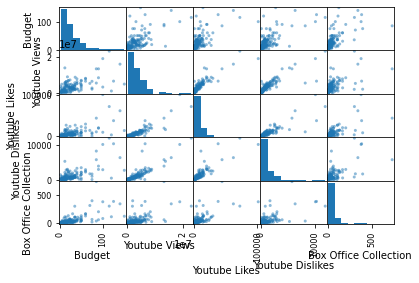

In [40]:
pd.plotting.scatter_matrix(data);

In [41]:
data.corr()

,Budget,Youtube Views,Youtube Likes,Youtube Dislikes,Box Office Collection
Budget,1.000000,0.589038,0.608916,0.665343,0.650401
Youtube Views,0.589038,1.000000,0.884055,0.846739,0.588632
Youtube Likes,0.608916,0.884055,1.000000,0.859730,0.682517
Youtube Dislikes,0.665343,0.846739,0.859730,1.000000,0.623941
Box Office Collection,0.650401,0.588632,0.682517,0.623941,1.000000


In [43]:
#Preparing the data

y = data['Box Office Collection']
X = data.drop('Box Office Collection',axis = 1)

In [22]:
#Dividing the dataset into training and testing dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size = 0.2,
                                                 random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

pd.DataFrame(regressor.coef_,X.columns,columns = ['Coefficients'])

,Coefficients
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [26]:
y_pred = regressor.predict(X_test)
pd.DataFrame({'Actual': y_test,'Predicted':y_pred})

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [27]:
from sklearn import metrics
print('Mean Absolute Error',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Absolute Error',metrics.mean_squared_error(y_test,y_pred))
print('RSME: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error 56.822247478964684
Mean Absolute Error 4666.344787588363
RSME:  68.3106491521517


In [28]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.2036193241012173

In [1]:
data = pd.read_csv("movie_boxoffice.csv")
data.head()

NameError: name 'pd' is not defined